In [2]:
from pathlib import Path
from datetime import datetime

#Run ID to be used for naming output files
RUN_ID = datetime.now().strftime("%Y%m%d")
RUNID_DASH = datetime.now().strftime("%Y-%m-%d")

RUN_ID = "20250827"
RUNID_DASH = "2025-08-27"


#Define paths for current project
# --- Centralized paths ---
ROOT = Path("..")
DATA = ROOT / "data"
LOGS = ROOT / "logs"
SCRIPTS = ROOT / "scripts"
RESULTS = ROOT / "results"
ALIGN_DIR = RESULTS / "align"
TREE_DIR = RESULTS / "trees"
FIGURES = RESULTS / "figures"

# --- Key files ---
GR_FASTA = DATA / "GR.fasta" #Starting file for BLAST search 
BLAST_OUT = DATA / "BAC88139.1_top150_uniref90.fasta"
RENAMED_FASTA = DATA / "BAC88139.1_top150_uniref90.rename.fasta"

CULLED_FASTA = DATA / f"BAC88139.1_top150_uniref90.rename.culled_{RUN_ID}.fasta"
DISCARDED_FASTA = DATA / f"BAC88139.1_top150_uniref90.rename.discarded_{RUN_ID}.fasta"
SUMMARY_CSV = LOGS / f"GR_max_similarity_{RUN_ID}.csv"

# --- Alignment and tree output ---
ALIGN_DIR.mkdir(parents=True, exist_ok=True)
TREE_DIR.mkdir(parents=True, exist_ok=True)
ALN_FASTA = ALIGN_DIR / f"BAC88139.1_top150_uniref90.rename.culled_{RUN_ID}_ALN.faa"
IQ_PREFIX = TREE_DIR / f"BAC88139.1_top150_uniref90.rename.culled_{RUN_ID}_ML_{RUNID_DASH}"

lmax_table_path = FIGURES / "lmax_table.txt"


In [6]:
import sys
sys.path.append(str(SCRIPTS))  # SCRIPTS is defined in your notebook context

from max_phylo_diversity import greedy_max_diversity
from Bio import Phylo

# Define your tree and taxa file paths
tree_file = TREE_DIR / f"combined_deduped_{RUN_ID}_ML_{RUNID_DASH}.treefile"
taxa_file = RESULTS / "test.txt"  # Your file with taxon names, one per line

# Read tree and taxa
tree = Phylo.read(tree_file, "newick")
with open(taxa_file) as f:
    taxa = [line.strip() for line in f if line.strip()]

# Set y (number of taxa to select)
y = 2

# Run the selection
selected = greedy_max_diversity(tree, taxa, y)
print("Selected taxa maximizing phylogenetic diversity:")
for t in selected:
    print(t)

Selected taxa maximizing phylogenetic diversity:
Cyhr__Halohasta__UR50_A0A1H6WB68
Pr__Pseudomonadota__UR50_A0A5J6N178



Lowest 10 λmax predictions:
                                  Names  Single_Prediction
         Br__Haloquadratum__UR50_Q18DH5              485.9
   Br__Halobacteriales__UR50_A0A2R6JL35              488.3
       Br__Halorutilus__UR50_A0A9Q4C3E6              492.7
Pr__Verrucomicrobiales__UR50_A0A2E2HQ20              492.8
       Cyr__Halapricum__UR50_A0A897NL32              493.5
    Pr__Pseudomonadota__UR50_A0A5J6N178              495.8
                  Pr__root__UR50_Q9AFF7              495.9
       Cyhr__Haloferacales__UR50_U1P7Y5              496.7
       Cyhr__Halohasta__UR50_A0A1H6WB68              497.3
        Cyhr__Halobacteria__UR50_P42196              499.3

Highest 10 λmax predictions:
                                                                          Names  Single_Prediction
                                            Xlr__Micrococcales__UR50_A0A1R3VVE3              554.8
                                           Xlr__Deinococcus__UR50_UPI0025F3DD2E              5

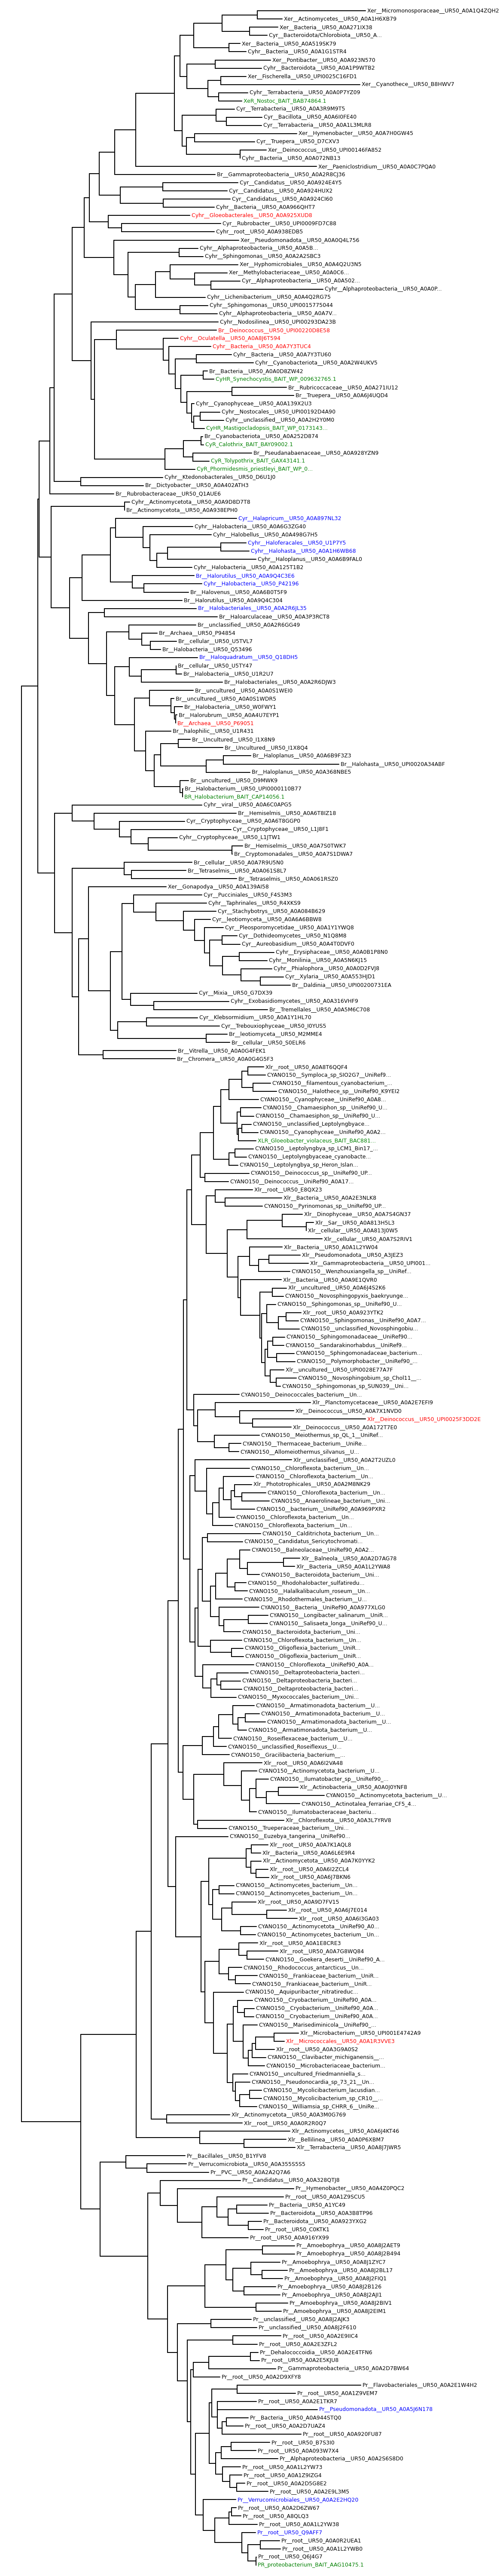

In [4]:
import sys
sys.path.append(str(SCRIPTS))
from plot_tree import plot_tree

# Path to your specific treefile
tree_file = TREE_DIR / f"combined_deduped_{RUN_ID}_ML_{RUNID_DASH}.treefile"
fig_path = FIGURES / f"combined_deduped_{RUN_ID}_tree.pdf"

plot_tree(
    tree_file,
    save_path=fig_path,
    figsize=(12, 60),
    optics_tsv="../results/optics/optics_on_optics_predictions_2025-08-28_22-04-07/optics_predictions_predictions.tsv",
    n=10,
    lmax_table_path=lmax_table_path
)